In [1]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [2]:
apple_df = fdr.DataReader("AAPL") # 주식 종목코드를 넣는다 외국껀 알파벳 특수번호!
# 데이터 프레임 반환. , start='2020'
# KQ11 코스닥, KS11 코스피
kospi = fdr.DataReader("KS11")
data = fdr.DataReader("KS11", start="2005")

In [3]:
apple_df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-12-12,0.13,0.13,0.13,0.13,469030000.0,-0.9988
1980-12-15,0.12,0.12,0.12,0.12,175880000.0,-0.0769
1980-12-16,0.11,0.11,0.11,0.11,105730000.0,-0.0833
1980-12-17,0.12,0.12,0.12,0.12,86440000.0,0.0909
1980-12-18,0.12,0.12,0.12,0.12,73450000.0,0.0000
...,...,...,...,...,...,...
2021-03-22,123.39,120.39,123.86,120.34,111910000.0,0.0283
2021-03-23,122.54,123.33,124.21,122.18,95470000.0,-0.0069
2021-03-24,120.09,122.71,122.80,120.09,88530000.0,-0.0200


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10158 entries, 1980-12-12 to 2021-03-26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   10158 non-null  float64
 1   Open    10158 non-null  float64
 2   High    10158 non-null  float64
 3   Low     10158 non-null  float64
 4   Volume  10158 non-null  float64
 5   Change  10158 non-null  float64
dtypes: float64(6)
memory usage: 555.5 KB


,Close,Open,High,Low,Volume,Change
count,10158.000000,10158.000000,10158.000000,10158.000000,1.015800e+04,10158.000000
mean,10.609586,10.607773,10.722561,10.488747,3.383158e+08,0.001037
std,21.451966,21.452752,21.702554,21.184342,3.417705e+08,0.034803
min,0.050000,0.050000,0.050000,0.050000,1.390000e+06,-0.998800
25%,0.270000,0.270000,0.280000,0.270000,1.297950e+08,-0.008300
50%,0.450000,0.450000,0.450000,0.440000,2.256350e+08,0.000000
75%,11.970000,11.975000,12.067500,11.857500,4.205575e+08,0.012200
max,143.160000,143.600000,145.090000,141.370000,7.430000e+09,0.277800


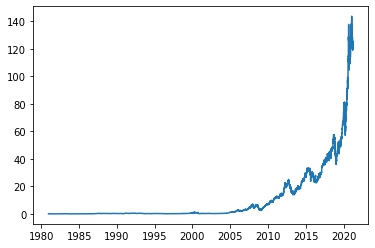

In [4]:
plt.plot(apple_df["Open"])
apple_df.info()
apple_df.describe()

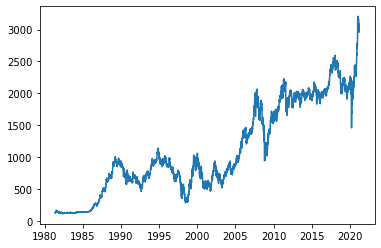

In [5]:
plt.plot(kospi["Close"])

In [6]:
kospi.dropna()
kospi.isnull().sum()

Close     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

In [7]:


#특성 추가 ------------------------------------------
    #이동평균선
def get_MA(df):
    MA_26=df["Close"].rolling(26).mean()
    MA_52=df["Close"].rolling(52).mean()
    df=df.assign(MA_26=MA_26,MA_52=MA_52).dropna()
    
    return df

    
    #스토캐스틱 : 주가 수준이 일정기간 동안의 가격변동 \
    # 속에서 어느 정도의 수준에 있는지를 백분율로 나타낸 지표.
def get_stochastic(df, n=15, m=5, t=3):
    # n일중 최고가
    ndays_high = df.High.rolling(window=n, min_periods=1).max()
    # n일중 최저가
    ndays_low = df.Low.rolling(window=n, min_periods=1).min()
 
    # Fast%K 계산
    kdj_k = ((df.Close - ndays_low) / (ndays_high - ndays_low))*100
    # Fast%D (=Slow%K) 계산
    kdj_d = kdj_k.ewm(span=m).mean()
    # Slow%D 계산
    kdj_j = kdj_d.ewm(span=t).mean()
 
    # dataframe에 컬럼 추가
    df = df.assign(kdj_k=kdj_k, kdj_d=kdj_d, kdj_j=kdj_j).dropna()
    
    return df


def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)
# Add Momentum_1D column for all 15 stocks.
# Momentum_1D = P(t) - P(t-1)


In [8]:
data=get_MA(data)
data=get_stochastic(data)

data['Momentum_1D'] = (data['Close']-data['Close'].shift(1))
data['RSI_14D'] = data['Momentum_1D'].rolling(center=False, window=14).apply(rsi)
data=data.dropna()
data = data.drop(labels = ['Momentum_1D'], axis=1)
# 우리가 원하는 지표(특성)에 대한 칼럼을 추가한다.

data

,Close,Open,High,Low,Volume,Change,MA_26,MA_52,kdj_k,kdj_d,kdj_j,RSI_14D
Date,,,,,,,,,,,,
2005-04-11,985.94,988.21,988.50,981.74,4.118400e+08,-0.0063,986.231538,971.548654,78.292731,82.309303,80.686109,38.501541
2005-04-12,981.79,982.44,985.99,979.73,4.775000e+08,-0.0042,985.032692,972.744423,70.073282,78.224410,79.455241,43.446935
2005-04-13,981.31,985.82,986.82,979.31,4.380800e+08,-0.0005,984.025385,973.863654,69.122599,75.187391,77.321299,49.987092
2005-04-14,953.92,973.40,973.86,953.92,4.196000e+08,-0.0279,982.242308,974.610192,14.874233,55.069392,66.195303,41.864655
2005-04-15,947.22,954.61,955.38,940.04,3.782600e+08,-0.0070,979.874231,974.999038,12.627506,40.915712,53.555484,42.228336
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,3035.46,3040.01,3048.11,3019.60,9.157400e+08,-0.0013,3057.412692,3076.937115,63.479718,65.456583,64.288731,63.203168
2021-03-23,3004.74,3038.25,3058.79,3003.05,1.330000e+09,-0.0101,3053.726538,3077.209615,46.869365,59.260844,61.774788,61.359419
2021-03-24,2996.35,2996.32,3006.54,2971.04,9.784300e+08,-0.0028,3047.932308,3077.750769,41.652677,53.391455,57.583121,65.002481


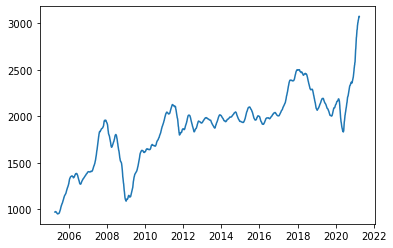

In [9]:
plt.plot(data["MA_52"])

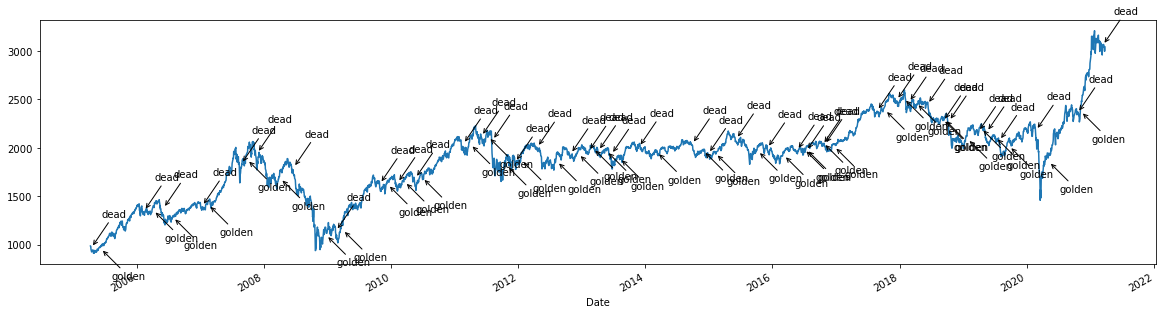

In [10]:
prev_val=0
f=data["Close"].plot(figsize=(20,5))
data["diff"]=data["MA_26"]-data["MA_52"]
for k,v in data["1997-1-1":]["diff"].iteritems():
    if(prev_val*v)<0:
        if v>prev_val:
            f.annotate("golden",xy=(k,data["MA_52"][k]),xytext=(10,-30),textcoords="offset points",
            arrowprops=dict(arrowstyle='->'))
        else:
            f.annotate("dead",xy=(k,data["MA_52"][k]),xytext=(10,30),textcoords="offset points",
            arrowprops=dict(arrowstyle='->'))
    prev_val=v
    
# 골든 데드 크로스 ㄷㄷ 떨어지기 시작할 때 데드, 올라가기 시작할 때 골든 해준다.

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
df = fdr.DataReader("KS11","2001-01-01","2019-01-01") 
df = df.drop(['Volume'], axis = 1 )

y=np.where(df["Change"]>0,1,0)
y=np.array(pd.DataFrame(y).shift(-1).dropna())
df=df[:-1]


scaler = MinMaxScaler(feature_range=(0, 1))
df["Close"]=scaler.fit_transform(df["Close"].values.reshape(-1,1))
df["Open"]=scaler.fit_transform(df["Open"].values.reshape(-1,1))
df["High"]=scaler.fit_transform(df["High"].values.reshape(-1,1))
df["Low"]=scaler.fit_transform(df["Low"].values.reshape(-1,1))
df["Change"]=scaler.fit_transform(df["Change"].values.reshape(-1,1))

# 내일 상승인지 하락인지 예측 - 분류
# 내일 얼마인지 예측 - 회귀